In [7]:
import json
import requests
import time

from json import JSONDecodeError

text = {"text": """The United States of America is a federal
republic consisting of 50 states, a federal district (Washington,
D.C., the capital city of the United States), five major territories,
and various minor islands. The 48 contiguous states and Washington, D.C.,
are in central North America between Canada and Mexico; the two other states,
Alaska and Hawaii, are in the northwestern part of North America and an archipelago
in the mid-Pacific, respectively, while the territories are scattered throughout the Pacific
Ocean and the Caribbean Sea."""}

In [8]:
sending = requests.post('http://localhost:8080/text', json=text)

In [9]:
print(sending.status_code)

200


In [10]:
while True:
    try:
        parcel = requests.get('http://localhost:8080/result')
        print(parcel.status_code)
        tree = json.loads(parcel.json())
        print(tree)
        print(tree["text"])
        break
    except JSONDecodeError:
        time.sleep(20)
        continue

200
200
200
{'text': 'north america', 'id': 0, 'nodes': [{'text': 'central north america', 'id': 1, 'nodes': [{'text': 'two', 'id': 6, 'nodes': []}, {'text': 'the two other states', 'id': 8, 'nodes': []}]}, {'text': 'the united states', 'id': 2, 'nodes': []}, {'text': 'the caribbean sea', 'id': 3, 'nodes': [{'text': 'america', 'id': 9, 'nodes': []}]}, {'text': 'the capital city', 'id': 4, 'nodes': []}, {'text': 'the mid - pacific', 'id': 5, 'nodes': [{'text': 'hawaii', 'id': 7, 'nodes': []}]}]}
north america


In [11]:
import pydot

graph = pydot.Dot(graph_type='graph')

print(tree['nodes'])

first_level = tree['text']
second_level = [node['text'] for node in tree['nodes']]
print(second_level)

for node in tree['nodes']:
    edge = pydot.Edge(first_level, node['text'])
    graph.add_edge(edge)
    print(node['nodes'])
    
    if node['nodes']:
        for node_3rd in node['nodes']:
            edge = pydot.Edge(node['text'], node_3rd['text'])
            graph.add_edge(edge)

[{'text': 'central north america', 'id': 1, 'nodes': [{'text': 'two', 'id': 6, 'nodes': []}, {'text': 'the two other states', 'id': 8, 'nodes': []}]}, {'text': 'the united states', 'id': 2, 'nodes': []}, {'text': 'the caribbean sea', 'id': 3, 'nodes': [{'text': 'america', 'id': 9, 'nodes': []}]}, {'text': 'the capital city', 'id': 4, 'nodes': []}, {'text': 'the mid - pacific', 'id': 5, 'nodes': [{'text': 'hawaii', 'id': 7, 'nodes': []}]}]
['central north america', 'the united states', 'the caribbean sea', 'the capital city', 'the mid - pacific']
[{'text': 'two', 'id': 6, 'nodes': []}, {'text': 'the two other states', 'id': 8, 'nodes': []}]
[]
[{'text': 'america', 'id': 9, 'nodes': []}]
[]
[{'text': 'hawaii', 'id': 7, 'nodes': []}]


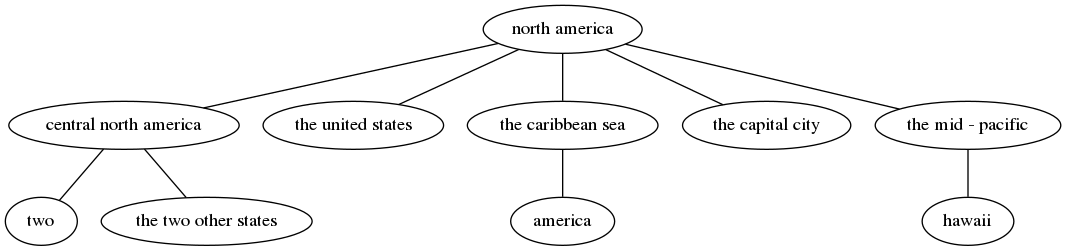

In [12]:
from IPython.display import Image, display

im = Image(graph.create_png())
display(im)